# Installing External Dependencies

In [ ]:
!pip install keras
!pip install tensorflow

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
data=pd.read_csv('Dataset2.csv')
data.drop('Sample code number',axis=1,inplace=True)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"2b,4m"
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Reading CSV Files

In [7]:
categories=["benign","malignant"]

#  Features of Dataset

In [8]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,"2b,4m"
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Data Augmentation using Re-encoding and Data Imputation

In [9]:
data['2b,4m'].replace([2,4],[0,1],inplace=True)

In [10]:
mean=round(data.mean()[6])
data['Bare Nuclei']=data['Bare Nuclei'].replace('?',mean)

# One hot encoding

In [35]:
values = data.values
X=values[:,:-1]
y=values[:,-1]
y = np_utils.to_categorical(y, len(categories))



# Making data set using train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42,stratify=y)

# Training the Model

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=10,validation_data=(X_test,y_test))
scores = model.evaluate(X_test, y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Train on 489 samples, validate on 210 samples
Epoch 1/100
489/489 [==============================] - 1s 2ms/step - loss: 1.6223 - acc: 0.6605 - val_loss: 0.9952 - val_acc: 0.6714
Epoch 2/100
489/489 [==============================] - 0s 726us/step - loss: 0.7760 - acc: 0.6564 - val_loss: 0.6610 - val_acc: 0.6095
Epoch 3/100
489/489 [==============================] - 0s 772us/step - loss: 0.6374 - acc: 0.6462 - val_loss: 0.6065 - val_acc: 0.7381
Epoch 4/100
489/489 [==============================] - 0s 687us/step - loss: 0.5958 - acc: 0.7301 - val_loss: 0.5586 - val_acc: 0.7905
Epoch 5/100
489/489 [==============================] - 0s 805us/step - loss: 0.5446 - acc: 0.7914 - val_loss: 0.5008 - val_acc: 0.8429
Epoch 6/100
489/489 [==============================] - 0s 779us/step - loss: 0.4860 - acc: 0.8262 - val_loss: 0.4531 - val_acc: 0.8619
Epoch 7/100
489/489 [==============================] - 0s 657us/step - loss: 0.4327 - acc: 0.8569 - val_loss: 0.4065 - val_acc: 0.8905
Epoch 8/100

# Accuracy-95.71%

In [41]:

import os

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics


def plot_history(history):
    if history.get('acc') and history.get('val_acc'):
        plt.plot(history['acc'], marker='.', label='train_accuracy')
        plt.plot(history['val_acc'], marker='.', label='validation_accuracy')
        plt.title('Model accuracy')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()
        plt.figure()
    

    if history.get('loss') and history.get('val_loss'):
        plt.plot(history['loss'], marker='.', label='train_loss')
        plt.plot(history['val_loss'], marker='.', label='validation_loss')
        plt.title('Model loss')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()


def save_metrics(y_test, y_pred, categories):
    y_test = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    classification_report = sklearn.metrics.classification_report(y_test, y_pred, target_names=categories, digits=5)
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
    confusion_matrix = confusion_matrix.astype('float')
    

    plt.imshow(confusion_matrix, interpolation='nearest', cmap='hot')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return confusion_matrix,classification_report


# Accuracy vs Epochs(knees at 10 epochs & saturates at 40 epochs)

# Loss vs Epochs



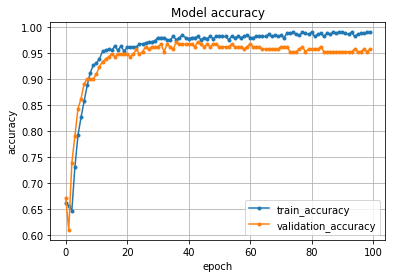

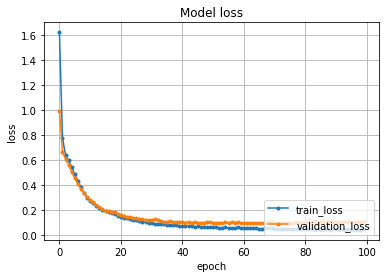

In [42]:
plot_history(history.history)

# Predicted Y for X_test  (Solution of  Question 1)

In [46]:
y_pred=model.predict(X_test)

# Save the model

In [47]:
def save_model(model):
    with open(os.path.join(".","saved") + '.json', 'w')as model_file:
        model_file.write(model.to_json())
    model.save_weights(os.path.join(".","saved") + '.h5')
    print('Saved model successfully')
save_model(model)

Saved model successfully


# Optimize the Threshold to minimize false negative

threshold is a function which takes parameters as y_pred and a value(like 0.5) above which we define the tumor is malignant.

We vary the threshold for predicting the malignant tumor and plot the respective false negatives and positives to inspect the optimal threshold at which the false negative rate is appreciably low and false positive rate is not noticibly high.

From inspection we find such a point at threshold=0.6.This means that when our model is >60% sure that the tumor is malignant,we 
are safe to inform the patient.


In [45]:
def threshold(y_pred,val):
    y=y_pred[:,1]>val
    y=y.astype("uint8")
    y = np_utils.to_categorical(y, len(categories))
    return y

In [52]:
margins=np.arange(0.05,1,step=.05)
false_negatives=[]
false_positives=[]
for margin  in margins:
    y_pred_curr=threshold(y_pred,margin)
    confusion_matrix = sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_curr, axis=1)).astype('float')
    ((true_positive,false_negative),(false_positive,true_negative))=confusion_matrix
    false_positives.append(false_positive)
    false_negatives.append(false_negative)

Text(0.5, 0, 'thresholds')

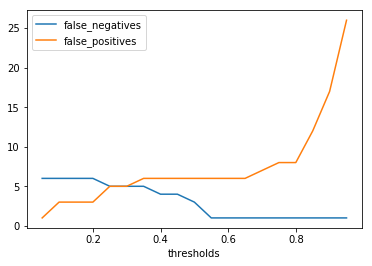

In [53]:
plt.plot(margins,false_negatives,label="false_negatives")
plt.plot(margins,false_positives,label="false_positives")
plt.legend()
plt.xlabel("thresholds")

In [63]:
y_pred_total=model.predict(X)

y_pred_curr=threshold(y_pred_total,0.6)
confusion_matrix = sklearn.metrics.confusion_matrix(np.argmax(y, axis=1), np.argmax(y_pred_curr, axis=1)).astype('float')
((true_positive,false_negative),(false_positive,true_negative))=confusion_matrix
print("False Positive",false_positive)
print("False Negative",false_negative)
print("number of test cases",len(y_pred_total))
print("on the threshold of p=",0.6)

False Positive 17.0
False Negative 2.0
number of test cases 699
on the threshold of p= 0.6


# Conclusion
In the dataset of 699 cases we find only 2 cases where we fail to predict the existance of malignant tumor in the patient,
We also have 17 patients who are erroneously informed of having a malignant tumor.